<a href="https://colab.research.google.com/github/cvaldesm1984/Accidentabilidad_Madrid/blob/main/Cesar_Valdes_Mendez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv', sep=',')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# 1. ANALISIS EDA

In [ ]:
df2 = df.copy() # creamos una copia del DF para no sobreescribir el original

In [ ]:
df2.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Existen variables de tipo "object" que habrá que transformar a variable numéricas, ya que los algoritmos de ML no admiten variables de este tipo.

In [ ]:
df2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Se observa que en las variables  Administrative_Duration, Informational_Duration, ProductRelated_Duration tiene valores negativos, por lo que debe tratarse de un error. Se transformarán estos valores a nulos para imputarlos posteriormente.

In [ ]:
df2.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [ ]:
round(df2.isnull().sum()/len(df2)*100, 2)

Administrative             0.11
Administrative_Duration    0.11
Informational              0.11
Informational_Duration     0.11
ProductRelated             0.11
ProductRelated_Duration    0.11
BounceRates                0.11
ExitRates                  0.11
PageValues                 0.00
SpecialDay                 0.00
Month                      0.00
OperatingSystems           0.00
Browser                    0.00
Region                     0.00
TrafficType                0.00
VisitorType                0.00
Weekend                    0.00
Revenue                    0.00
dtype: float64

In [ ]:
vars_numericas_nulas = ['Administrative', 'Administrative_Duration',
                        'Informational', 'Informational_Duration',
                        'ProductRelated', 'ProductRelated_Duration',
                        'BounceRates', 'ExitRates'
                        ]

df2[vars_numericas_nulas] = df2[vars_numericas_nulas].fillna(0)

Se identificaron valores nulos en variables que representan conteo o duración de páginas visitadas.
Dado que estas variables pueden interpretarse como "no interacción", se ha optado por imputar los nulos con 0, lo cual es razonable y evita eliminar observaciones del dataset.

In [ ]:
df2.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Visualizaciones

In [ ]:
df2['Revenue'].value_counts() #cantidad de sesiones con y sin compra

Revenue
False    10422
True      1908
Name: count, dtype: int64

C:\Users\cvald\AppData\Local\Temp\ipykernel_4416\1281155470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df2, palette='pastel')


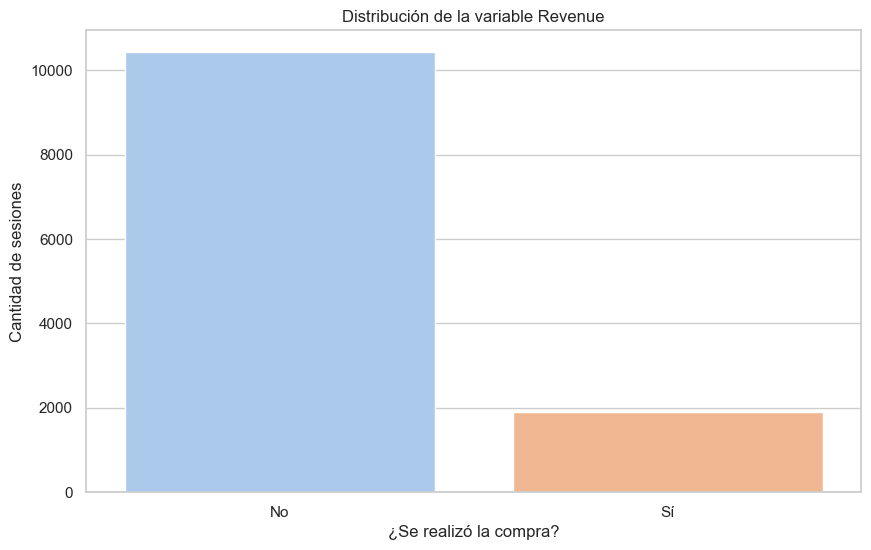

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', data=df2, palette='pastel')
plt.title('Distribución de la variable Revenue')
plt.xlabel('¿Se realizó la compra?')
plt.ylabel('Cantidad de sesiones')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

De un total de 12.330 sesiones de ingreso (filas)

- 10.422 sesiones NO terminaron en compras
- 1.908 sesiones SI terminaron en compras

In [ ]:
df['VisitorType'].value_counts() #conteo por tipo de visitantes

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Segmentación de los visitantes por Revenue

In [ ]:
df2.groupby(['VisitorType', 'Revenue']).size().unstack() #

Revenue,False,True
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


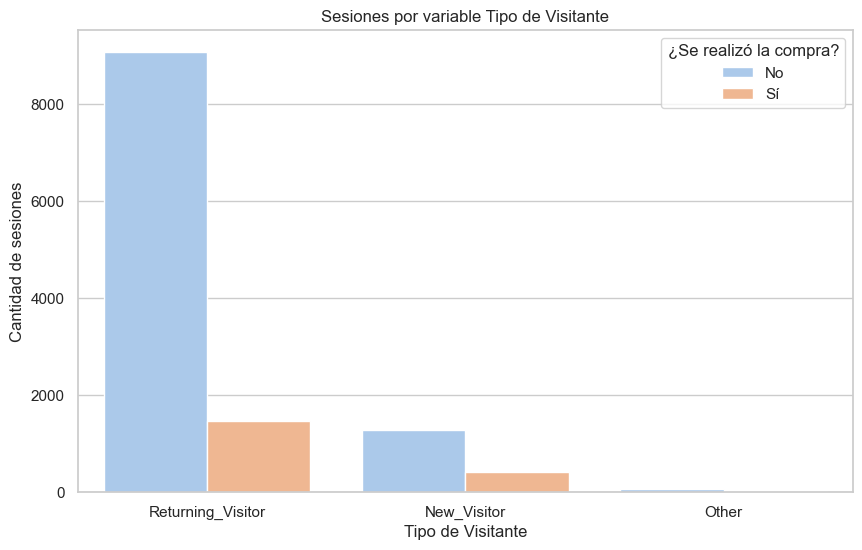

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue= 'Revenue', data=df2, palette='pastel')
plt.title('Sesiones por variable Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Cantidad de sesiones')
plt.legend(title='¿Se realizó la compra?', labels=['No', 'Sí'])
plt.show()

Se puede deducir de esta gráfica lo siguiente:
* Los visitantes que regresan son más propensos a comprar
* Los nuevos visitantes compran menos que los visitantes que regresan, pero tienen un buen potencial de compra
* Casi ningún visitante catalogado como OTRO genera compras

Porcentaje de compras por tipo de visitante

In [ ]:
compras_por_tipo = df2[df2['Revenue'] == True]['VisitorType'].value_counts()
total_por_tipo = df2['VisitorType'].value_counts()
porcentaje_compras = compras_por_tipo / total_por_tipo * 100
print(porcentaje_compras)

VisitorType
Returning_Visitor    13.932329
New_Visitor          24.911452
Other                18.823529
Name: count, dtype: float64


C:\Users\cvald\AppData\Local\Temp\ipykernel_4416\1584368500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


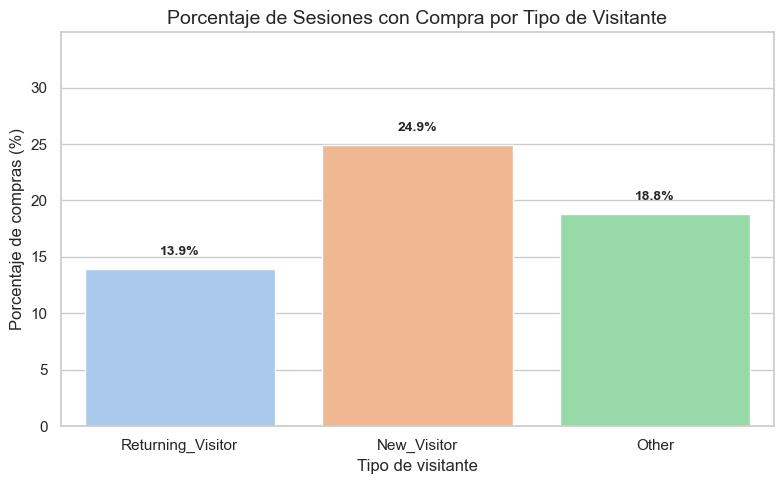

In [ ]:
porcentaje_compras_df2 = porcentaje_compras.reset_index()
porcentaje_compras_df2.columns = ['Tipo de visitante', 'Porcentaje de compras (%)']
porcentaje_compras_df2['Porcentaje de compras (%)'] = porcentaje_compras_df2['Porcentaje de compras (%)'].round(1)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=porcentaje_compras_df2,
    x="Tipo de visitante",
    y="Porcentaje de compras (%)",
    palette="pastel"
)

plt.title("Porcentaje de Sesiones con Compra por Tipo de Visitante", fontsize=14)
plt.ylabel("Porcentaje de compras (%)")
plt.xlabel("Tipo de visitante")
plt.ylim(0, porcentaje_compras_df2["Porcentaje de compras (%)"].max() + 10)

for i, row in porcentaje_compras_df2.iterrows():
    plt.text(i, row["Porcentaje de compras (%)"] + 1, f'{row["Porcentaje de compras (%)"]}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

* El mayor % de conversión se da en visitantes nuevos, con un 25% de sesiones que terminan en compra.
* Los visitantes clasificados como OTROS tiene un 19% de sesiones que terminan en compra.
* Los visitantes recurrentes, de mayor representacion del dataset, son lo que menor % de conversion, solo un 14% de todas las sesiones terminan en compra.


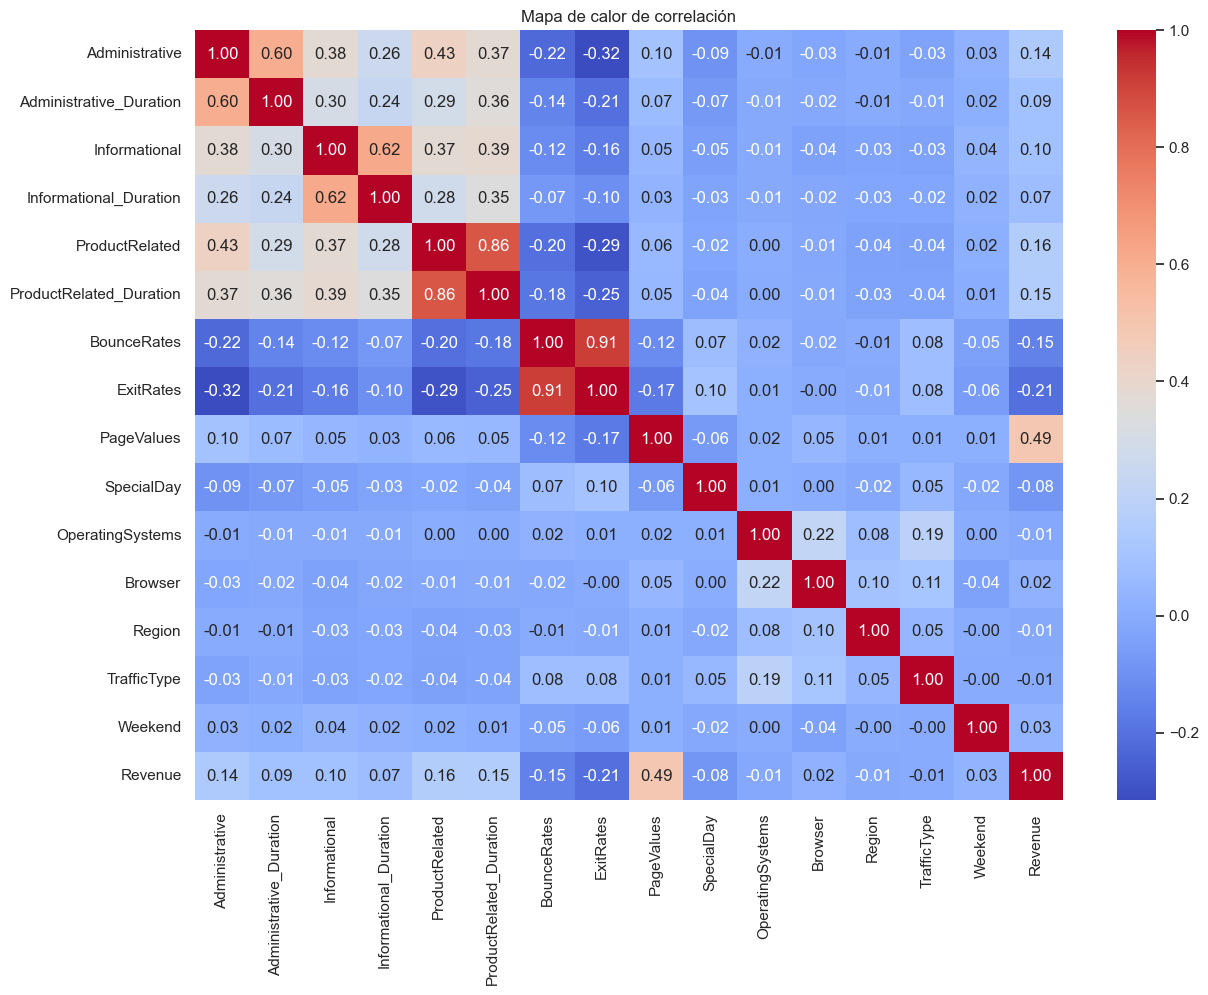

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df2.corr(numeric_only = True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

Análisis Mapa de Correlaciones

+ Positivas:
1. ExitRated - BounceRated (0.91)
Tienen relacion ambas métricas ya que registran salidas del sitio
2. ProductRelated - ProductRelatedDuration (0.86)
Mayor cantidad de productos visitados, mayor es el tiempo que se pasa con ellos

3. Informational - InformationalDuration (0.62)
Más paginas visitadas, mas tiempo se pasa en ellas


+ Negativas:
1. BounceRated - PagesValues (-0.15)
Indica que la tasa de rebote es alta y el valor de las páginas es bajo.

2. ExitRated - Revenue (-0.21)
A una mayor tasa de salida menos compras se realizan.

* Correlacion con la variable objetivo
1. Revenue - PageValue (0.49)
Indica que a mayor valor de las páginas, mayor es la probabilidad de compras realizadas.


C:\Users\cvald\AppData\Local\Temp\ipykernel_4416\848710312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df2, order=[


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

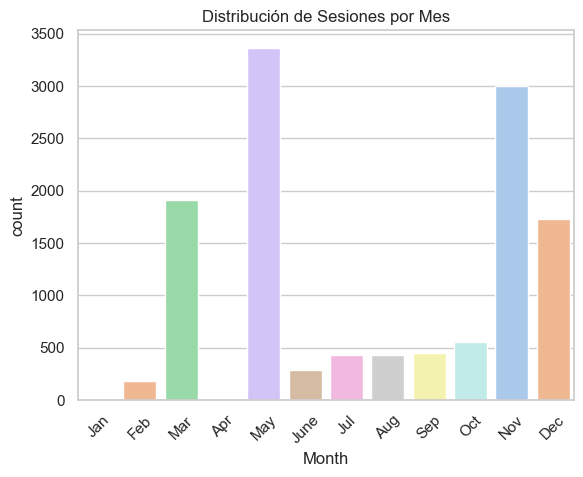

In [ ]:
plt.figure()
sns.countplot(x="Month", data=df2, order=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], palette="pastel")
plt.title("Distribución de Sesiones por Mes")
plt.xticks(rotation=45)

Distribución por Mes
* La mayoría de las sesiones se concentran en mayo y noviembre, probablemente asociado a campañas comerciales como Black Friday por ejemplo.

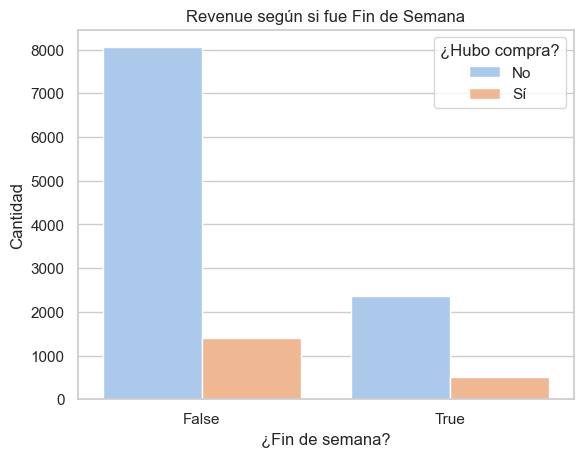

In [ ]:
plt.figure()
sns.countplot(x="Weekend", hue="Revenue", data=df2, palette="pastel")
plt.title("Revenue según si fue Fin de Semana")
plt.xlabel("¿Fin de semana?")
plt.ylabel("Cantidad")
plt.legend(title="¿Hubo compra?", labels=["No", "Sí"])

In [ ]:
conversion_weekend = df2.groupby('Weekend')['Revenue'].mean()*100
print(conversion_weekend)

Weekend
False    14.891144
True     17.398884
Name: Revenue, dtype: float64


Revenue según Fin de Semana
* Aunque hay menos visitas en fin de semana, la proporción de compras es ligeramente mayor por lo que se puede reforzar con campañas de MKT digital para estos días de la semana.

# 2. PRE PROCESAMIENTO DE DATOS

## Detección de Outliers

In [ ]:
vars_continuas = ['Administrative', 'Administrative_Duration',
                 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues'
]

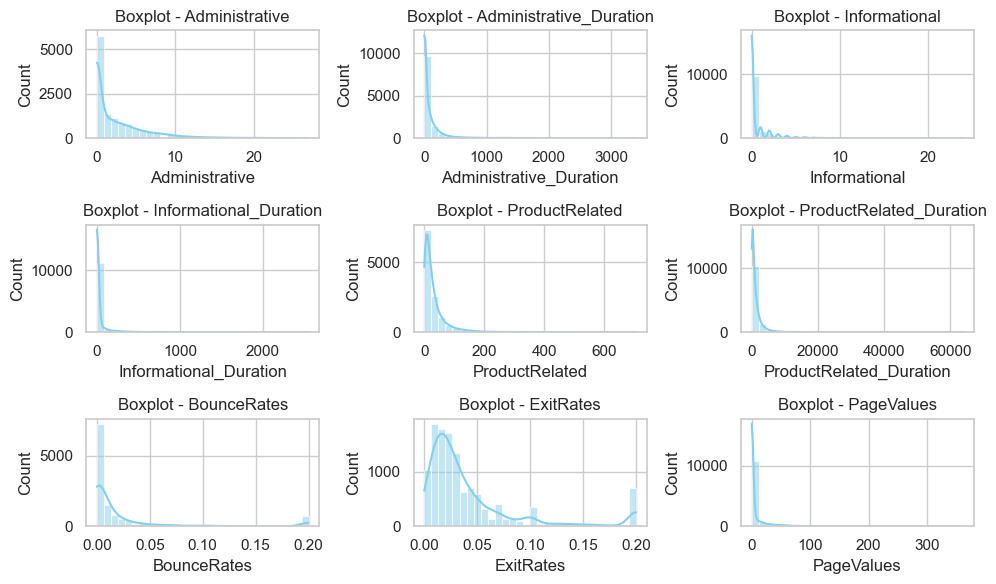

In [ ]:
plt.figure(figsize=(10, 6))
for i, var in enumerate(vars_continuas):
    plt.subplot(3, 3, i+1)
    sns.histplot(df2[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Boxplot - {var}')

plt.tight_layout()
plt.show()

Se aprecia que casi todas las variables se encuentran sesgadas a la derecha, lo que que indica que la mayoría de los datos tiene poca interacción y unas pocas con interacciones muy largas o intensas.

Esto refleja un patrón en los visitantes de las paginas de e-commerce, donde se los usuarios abandonan rápidamente el sitio, ven pocas páginas relacionadas a Administrative, Informational y ProductRelated que lo muestran los indicadores *_Duration.

Esto se puede deber a falta de interés, la pagina tiene mala experiencia de usuario (UX), llegan por clic por error que lo indica el BounceRates.

Existen pocos usuario comprometidos ya que solo un grupo muy pequeño pasa o interactua más tiempo dentro del sitio, visitando más enlaces, siendo ellos los con mayor tasa de Revenue.

## Descripcion de las variables object

In [ ]:
categorical_cols = df2.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(col)
    print(df2[col].unique())

Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']


## Codificacion de variables categóricas

In [ ]:
df2['Weekend'] = df2['Weekend'].astype(int)
df2['Revenue'] = df2['Revenue'].astype(int)

In [ ]:
order_month = { 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
                 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9,
                 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df2['Month'] = df2['Month'].map(order_month)

In [ ]:
le = LabelEncoder()
df2['VisitorType'] = le.fit_transform(df2['VisitorType'])

In [ ]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


# 3. Ajuste y evaluación de distintos modelos de clasificación

In [ ]:
#!pip install pylance

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from kds.metrics import plot_cumulative_gain
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

Separación de la variables predictoras y target

In [ ]:
x = df2.drop('Revenue', axis=1)
y = df2['Revenue']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Estandarización

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Modelo KNN

In [ ]:
auc_scores = []
neighbors = range(1, 21)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred_proba = knn.predict_proba(x_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)

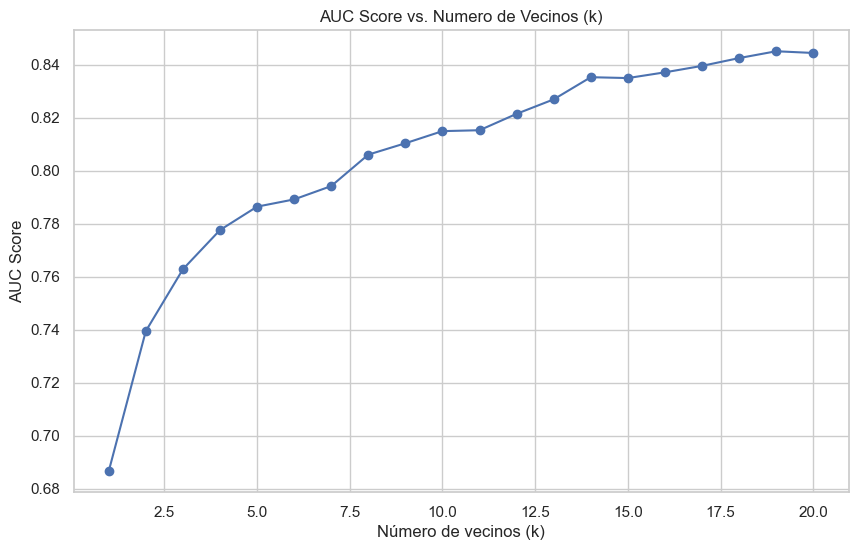

Mejor AUC con K es el 19 con un 0.8451


In [ ]:
plt.figure (figsize=(10, 6))
plt.plot(neighbors, auc_scores, marker='o')
plt.title('AUC Score vs. Numero de Vecinos (k)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('AUC Score')
plt.grid(True)
plt.show()

#Mejor Modelo
k_optimo = neighbors[np.argmax(auc_scores)]
print(f"Mejor AUC con K es el {k_optimo} con un {max(auc_scores):.4f}")

Un AUC (Area bajo la curva) nos muestra el area bajo la curva ROC, lo que es clave para interpretar el modelo, especialemnte cuando tenemos clases desbalanceadas, como en este caso, donde 85% no compran vs 15% que si compran.

Considerando que el valor AUC, oscila entre 0 y 1, en nuestro caso, al tener un 0.8451 indica que nuestro modelo tiene una buena capacidad para discriminar entre compradores y no compradores. Es decir si tomamos un cliente aleatorio que si compró y otro que no compró, el modelo tiene un 85.4% de probabilidad de asignar una probabilidad más alta de compra al cliente que si compró.

Como ya tenemos el 19 como mejor modelo, podemos calcular métricas adicionales como: matriz de consución, F1 Score, Precisión, Recall, Accuracy

### Entrenamiento del modelo y predicciones

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k_optimo)
knn.fit(x_train_scaled, y_train)

y_pred = knn.predict(x_test_scaled)
y_pred_proba = knn.predict_proba(x_test_scaled)[:, 1]

### Matriz de Confusión

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: \n", cm)

Matriz de confusión: 
 [[2020   35]
 [ 291  120]]


Resultados de Matriz de Confusión:

+ 2020: Verdaderos Positivos, clientes que no compraron y el modelo lo predijo bien.
+ 35: Falsos Positivos, clientes que compraron pero el modelo lo predijo mal.
+ 291: Falsos Negativos, clientes que si compraron pero el modelo no detectó.
+ 120: Verdaderos Negativos, clientes que si compraron y el modelo lo predijo bien.

### Accuracy, Precisión, Recall, F1-Score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Accuracy:  0.8678
Precision: 0.7742
Recall:    0.2920
F1-score:  0.4240


+ Accuracy: 86.78% del total predicciones fue correcta
+ Precisión: De todos los clientes que el modelo predijo que comprarían, el 77.42% realmente lo hizo.
+ Recall: De todos los compradores que el modelo predijo, solo el 29.20% realmente lo hizo, por lo que el casi 70% de los compradores reales se pierden de vista.

+ F1-score: Este es el promedio armónico entre precisión y recall. Al ser bajo el recall baja también precisión.

Que nos dicen estos resultados, que nuestro modelo predice bien cuando NO comprarán y muy preciso cuando dicen que comprarán, pero no están encontrando a muchos de los compradores reales, lo que puede causar un problema si se quieren maximizar los ingresos o captar las oportunidades de negocio.


### Curva ROC

In [ ]:
from sklearn.metrics import auc as auc_score

C:\Users\cvald\AppData\Local\Temp\ipykernel_4416\2014857291.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', color='red')


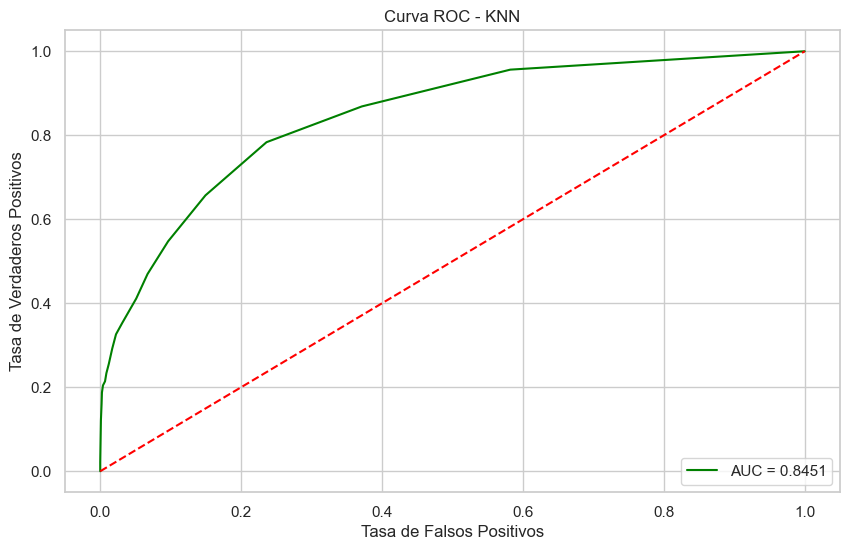

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc_score(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='green')
plt.plot([0, 1], [0, 1], 'r--', color='red')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

La curva ROC evalúa el rendimiento de un modelo de clasificación binaria a diferentes umbrales de decisión.
+ Eje X: Tasa de Falsos Positivos (FPR), es la proporción de clientes no compran, pero el modelo predice que si.
+ Eje Y: Tasa de Verdaderos Positivos (TPR), es la proporción de clientes que si compran y el modelo predice correctamente.

La curva verde evalúa el rendimiento del modelo KNN para distintos umbrales y la linea punteada roja es el rendimiento aleatorio (sin valor predictivo) que sirve como referencia.

Este resultado nos indica que el modelo logra una buena tasa de verdaderos positivos con una baja tasa de falsos negativos, por cuanto más se aleje de la linea roja, mejor es el modelo.


### Curva de Ganancia Acumulada

Aquí se mide cómo se concentra la tasa de aciertos si se seleccionan los clientes con mayor probabilidad de compra.

In [ ]:
gain_df = pd.DataFrame({'prob': y_pred_proba, 'real': y_test})
gain_df = gain_df.sort_values(by='prob', ascending=False).reset_index(drop=True)
gain_df['cumulative_gain'] = gain_df['real'].cumsum()
gain_df['cumulative_perc'] = gain_df['cumulative_gain'] / gain_df['real'].sum()
gain_df['clientes_perc'] = (gain_df.index + 1) / len(gain_df)

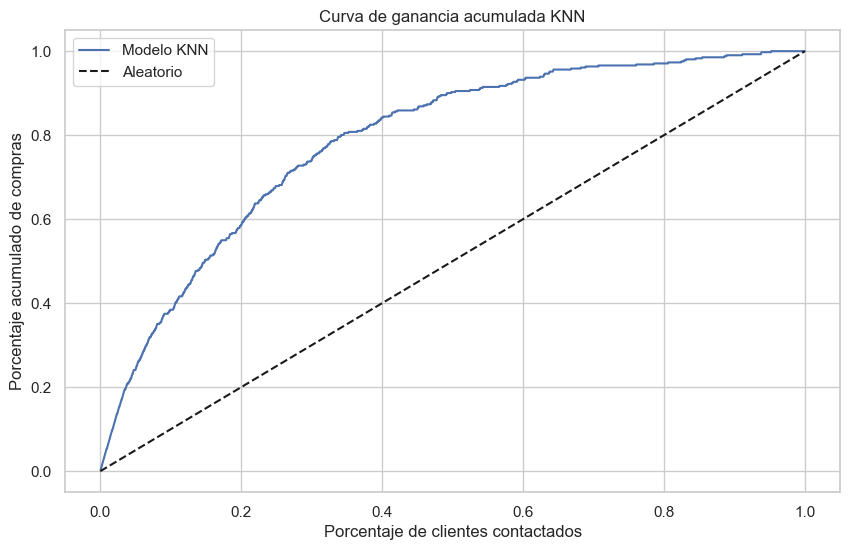

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gain_df['clientes_perc'], gain_df['cumulative_perc'], label='Modelo KNN')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Porcentaje de clientes contactados')
plt.ylabel('Porcentaje acumulado de compras')
plt.title('Curva de ganancia acumulada KNN')
plt.legend()
plt.grid(True)
plt.show()

La curva de ganancia acumulada es de las gráficas más útiles desde el punto de vista del negocio, ya que nos permitirá tomar decisiones estratégicas sobre que clientes debemos priorizar.

Nos muestra como los verdaderos positivos (compradores reales) a medida que vamos contactando clientes según la probabilidad de compra predicha por el modelo.
+ Eje X: % de clientes contactados (ordenados desde mayor a menor probabilidad).
+ Eje Y: % de compras reales acumuladas capturadas al contactar ese % de clientes.

La línea azul refleja como mejora la captación de clientes compradores si se prioriza a los clientes mejor evaluados por el modelo. Claramente se eleva por sobre la diagonal, lo que indica un valor predictivo real.

La línea negra punteada nos muestra una referencia aleatoria, es decir, si eliges clientes sin modelo, para obtener el 50% de las compras, debes contactar al 50% de la base.

In [ ]:
# % de compradores captados si contacto al 30% de clientes
clientes_30 = int(0.3 * len(gain_df))
ganancia_30 = gain_df.loc[clientes_30, 'cumulative_perc']
print(f"Con el 30% de clientes mejor evaluados captas el {ganancia_30*100:.1f}% de las compras.")


Con el 30% de clientes mejor evaluados captas el 74.0% de las compras.


Que podemos extraer de esto, que si contactamos al 30% de los clientes con mayor evaluación, capturas el 74% de la compras reales. Esto se traduce en ganancias operativas, ya que se ahorran recursos y se pueden enfocar en acciones como campañas, descuentos y otras promociones en una pequeña parte del total.

## Ramdom Forest Classifier

Elegimos el modelo RFC porque este nos ofrece un mejor rendimiento que un árbol de decisión simple y además es menos propenso a realizar overfitting.

### Definición de parámetros

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
rf= RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Estos hiperparámetros son los más relevantes en RF:
- **n_estimators**: El número de árboles que se van a entrenar. Más árboles, mejor generalización
- **max_depth**: La profundidad máxima de cada árbol. Limita el overfitting, si es NONE, los arboles crecen hasta que las hojas sean puras.
- **min_samples_split**: El número mínimo de muestras para dividir. Evita particiones sobreajustadas con pocos datos. Valores altos, arboles más simples.
- **min_samples_leaf**: El número mínimo de muestras en cada hoja. Estabiliza las ramas, reduce el overfitting.

### Optimización de Hiperparámetros con Grid Search

In [ ]:
X = df2.drop('Revenue', axis=1)
y = df2['Revenue']

# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                       scoring='roc_auc', cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [ ]:
print("Mejores parámetros:", grid_rf.best_params_)

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


Estos datos nos indican que el modelo permite árboles profundos (max_depth= None), pero controla el sobreajuste con:
- min_samples_split= 10 > no se divide un nodo si no hay al menos 10 observaciones.
- min_samples_leaf= 2 > cada hoja debe tener al menos 2 muestras.
- n_estimators= 100 > arboles balancean bien el rendimiento y el tiempo de cómputo.

### Prediccion

In [ ]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

### Matriz de Confusión

In [ ]:
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

Matriz de confusión:
 [[3003  124]
 [ 244  328]]


### Reporte de Clasificación

In [ ]:
print("Reporte de clasificación:\n",
      classification_report(y_test, y_pred_rf))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.73      0.57      0.64       572

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.89      0.90      0.90      3699



- Accuracy (90%): Exite un porcentaje muy alto, pero se debe al desbalance de las clases.
- Precision (73%): Cuando el modelo predice que alguien comprará, acierta un 73% de las veces, esto es muy bueno si se quiere reducir el gasto en clientes que no compran.
- Recall (57%): Es mucho mejor que el recall de KNN (29%). Ahora captamos más de la mitad de los que realmente compran.
- F1-score (64%): Buen balance entre precisión y recall.

### Curva AUC

In [ ]:
print(f"Mejor AUC en validación cruzada: {grid_rf.best_score_:.4f}")

Mejor AUC en validación cruzada: 0.9311


In [ ]:
auc_rf = roc_auc_score(y_test, y_proba_rf)

De esto se deduce:
- Ambos valores son excelentes (> 0.9), y muy cercanos entre sí, lo que indica que el modelo generaliza bien y no está sobreajustado.
- Significa que el modelo tiene una gran capacidad para discriminar entre compradores y no compradores

### Visualización de la curva ROC

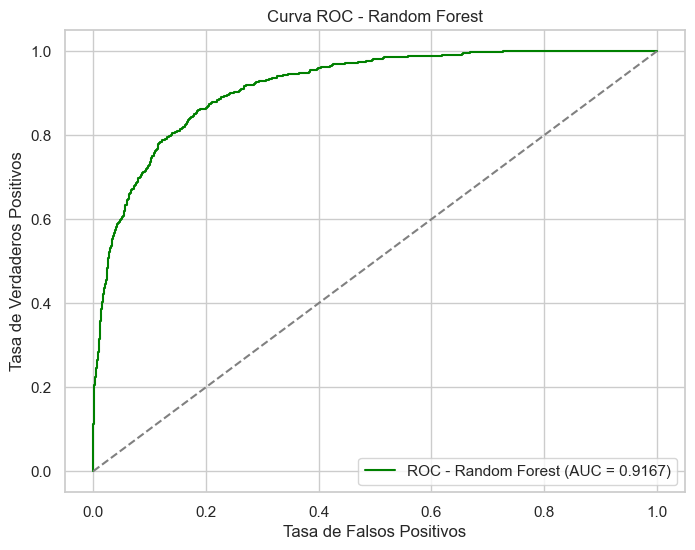

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc_score(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC - Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

La gráfica de la curva ROC nos confirma de manera visual que este modelo tiene una muy buena capacidad predictiva.
- Eje X: Tasa de falso positivos (FPR) > % de clientes que no compraron pero que fueron clasificados como compradores.
- Eje Y: Tasa de verdaderos positivos (TPR) > % de clientes que si compraron y fueron clasificados como compradores.

Esto se traduce en que el modelo logra detectar una gran cantidad de compradores mientras mantiene bajo el numero de falsos positivos.
Se aprecia además una segmentación de clases más clara, mucho mejor que el modelo aleatorio (línea gris)

El AUC de 0.9167, nos muestra que si se elige un cliente que realmente compró y otro que no, el modelo tiene un 91.67% de probabilidad de poder de asignar una probabilidad mayor de compra al cliente real.

En conclusión, esto supera ampliamente al modelo KNN, que obtuvo un 0.8451, tiene mejor precisión y recall, y mejor comportamiento en la curva ROC.



### Curva de ganancia acumulada

In [ ]:
gain_rf = pd.DataFrame({'prob': y_proba_rf, 'real': y_test})
gain_rf = gain_rf.sort_values(by='prob', ascending=False).reset_index(drop=True)

# Calcular métricas acumuladas
gain_rf['cumulative_gain'] = gain_rf['real'].cumsum()
gain_rf['cumulative_perc'] = gain_rf['cumulative_gain'] / gain_rf['real'].sum()
gain_rf['clientes_perc'] = (gain_rf.index + 1) / len(gain_rf)

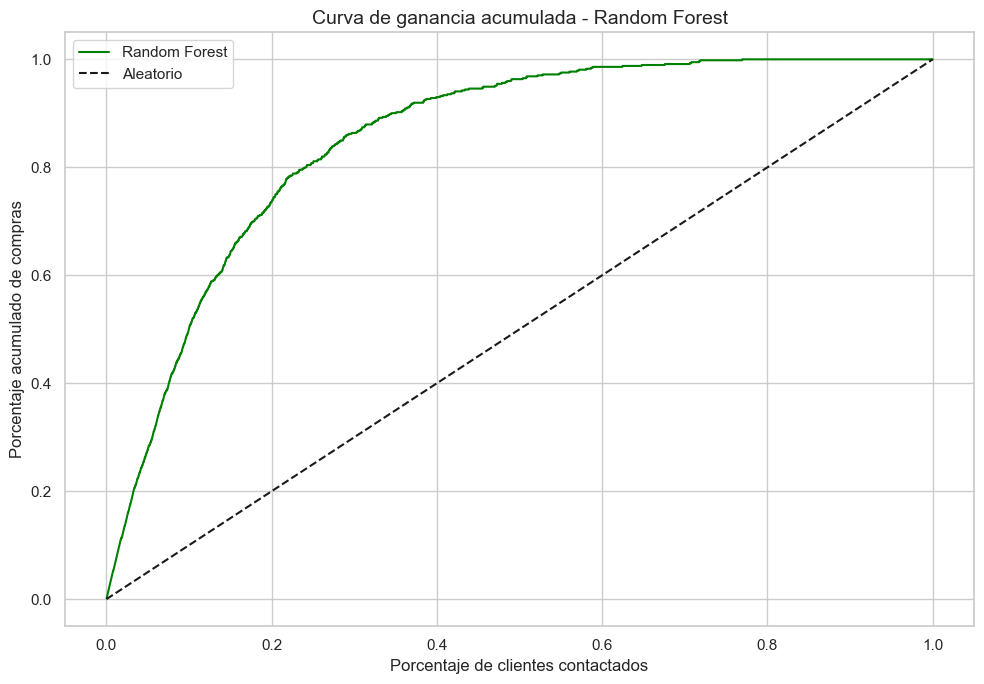

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(gain_rf['clientes_perc'], gain_rf['cumulative_perc'], label='Random Forest', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio', linewidth=1.5)
plt.title('Curva de ganancia acumulada - Random Forest', fontsize=14)
plt.xlabel('Porcentaje de clientes contactados')
plt.ylabel('Porcentaje acumulado de compras')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# % de compradores captados si contacto al 30% de clientes
clientes_30 = int(0.3 * len(gain_rf))
ganancia_30 = gain_rf.loc[clientes_30, 'cumulative_perc']
print(f"Con el 30% de clientes mejor evaluados captas el {ganancia_30*100:.1f}% de las compras.")

Con el 30% de clientes mejor evaluados captas el 86.4% de las compras.


Que podemos extraer de esto, que si contactamos al 30% de los clientes con mayor evaluación, con este modelo capturas el 86.4% de la compras reales. Es mucho mejor que el modelo KNN , que solo captura el 74.0% de las compras reales, es una excelente justificación para adoptar el modelo RFC como tu modelo final.

### Visualización comparativa entre KNN y RFC

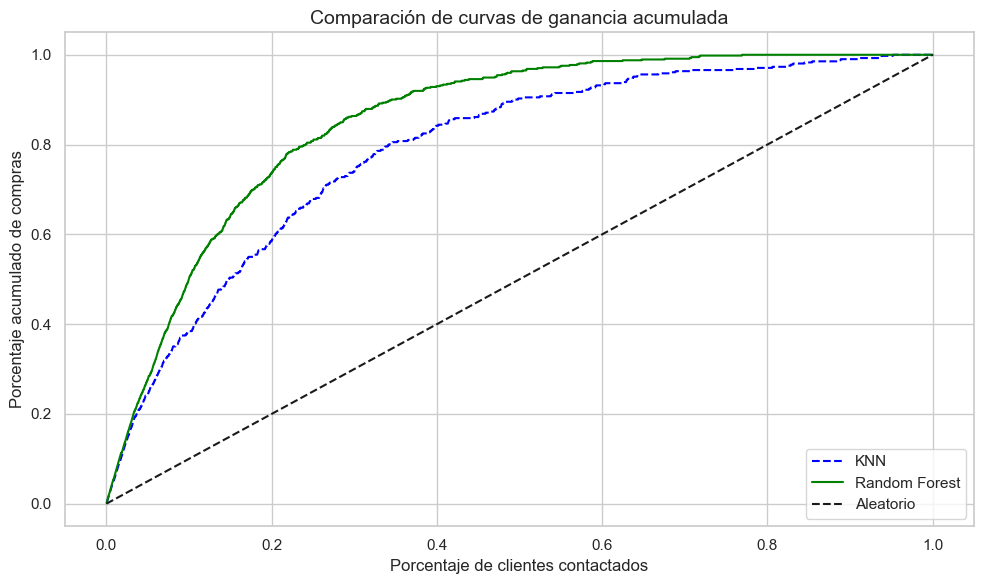

In [ ]:
plt.figure(figsize=(10, 6))

# Curva KNN
plt.plot(gain_df['clientes_perc'], gain_df['cumulative_perc'],
         label='KNN', linestyle='--', color='blue')

# Curva Random Forest
plt.plot(gain_rf['clientes_perc'], gain_rf['cumulative_perc'],
         label='Random Forest', linestyle='-', color='green')

# Línea aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

# Etiquetas y leyenda
plt.title('Comparación de curvas de ganancia acumulada', fontsize=14)
plt.xlabel('Porcentaje de clientes contactados')
plt.ylabel('Porcentaje acumulado de compras')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica comparativa reafirma lo ya comentado anteriormente, donde el modelo RFC es mejor el modelo KNN tanto técnica como estratégicamente.
+ Mayor AUC (0.9167 vs 0.8451)
+ Mejor Recall (57% vs 29%)
+ Mayor precision operativa: con el 30% de los clientes captas 86.4% de los compras.

RFC permite:

+ Reducir costos de campañas contactando a menos clientes.
+ Maximiza ingresos, priorizando a quienes si comprarían.


## Red Neuronal MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

### Grilla de Hiperparámetros

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'max_iter': [300]
}

+ alpha es el parámetro  de regularización (evita el sobreajuste)
+ max_iter define el número de épocas

### Entrenamiento con GridSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(random_state=42)

grid_mlp = GridSearchCV(estimator=mlp,
                        param_grid=param_grid_mlp,
                        scoring='roc_auc',
                        cv=3,
                        n_jobs=-1)

grid_mlp.fit(X_train_scaled, y_train)

c:\Users\cvald\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'max_iter': [300]},
             scoring='roc_auc')

In [ ]:
print("Mejores parámetros:", grid_mlp.best_params_)
print(f"Mejor AUC (validación cruzada): {grid_mlp.best_score_:.4f}")

Mejores parámetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'max_iter': 300}
Mejor AUC (validación cruzada): 0.9127


In [ ]:
best_mlp = grid_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_scaled)
y_proba_mlp = best_mlp.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_mlp))

Matriz de confusión:
 [[2988  139]
 [ 270  302]]


In [ ]:
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_mlp))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.68      0.53      0.60       572

    accuracy                           0.89      3699
   macro avg       0.80      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699



+ Accuracy= 89% > Muy buena en general, pero sensible al desbalance.
+ Precision (compra)= 68% >	68 de cada 100 predicciones de compra fueron correctas.
+ Recall (compra)= 53% > Se identificó correctamente al 53% de los compradores reales.
+ F1-score=	60% > Balance entre precisión y recall para clase 1 (compradores).

In [ ]:
print(f"AUC en test: {roc_auc_score(y_test, y_proba_mlp):.4f}")

AUC en test: 0.9027


Existe una muy buena discriminación entre las clases.

In [ ]:
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = auc_score(fpr_mlp, tpr_mlp)

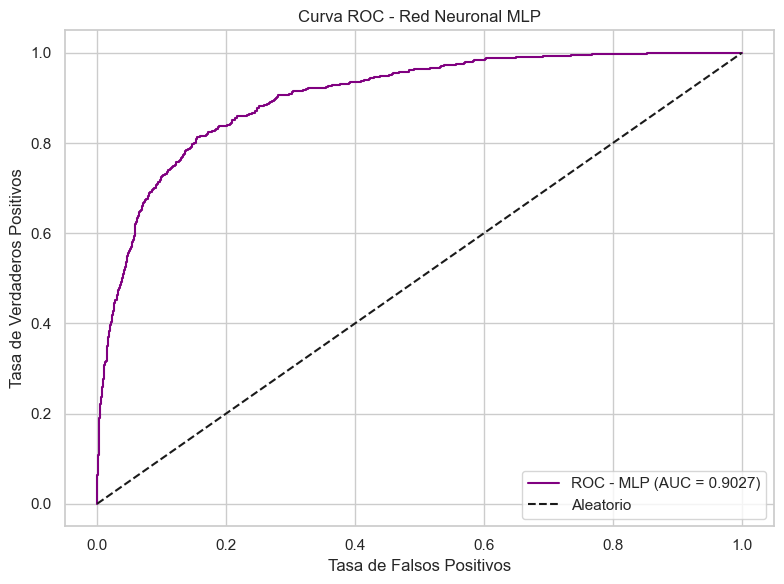

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'ROC - MLP (AUC = {roc_auc_mlp:.4f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Red Neuronal MLP')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

+ Se curva fuertemente hacia la esquina superior izquierda, lo cual indica una alta capacidad para distinguir entre clientes compradores y no compradores.
+ La pendiente inicial pronunciada es buena: significa que en los primeros tramos (clientes con mayor score), el modelo detecta muchos compradores con pocos errores.
+ Esto significa que si tomas un cliente que compró y otro que no, el modelo MLP tiene un 90.3% de probabilidad de asignar una mayor probabilidad de compra al comprador real.

### Curva de Ganancia Acumulada MLP

In [ ]:
gain_mlp = pd.DataFrame({'prob': y_proba_mlp, 'real': y_test})
gain_mlp = gain_mlp.sort_values(by='prob', ascending=False).reset_index(drop=True)

gain_mlp['cumulative_gain'] = gain_mlp['real'].cumsum()
gain_mlp['cumulative_perc'] = gain_mlp['cumulative_gain'] / gain_mlp['real'].sum()
gain_mlp['clientes_perc'] = (gain_mlp.index + 1) / len(gain_mlp)

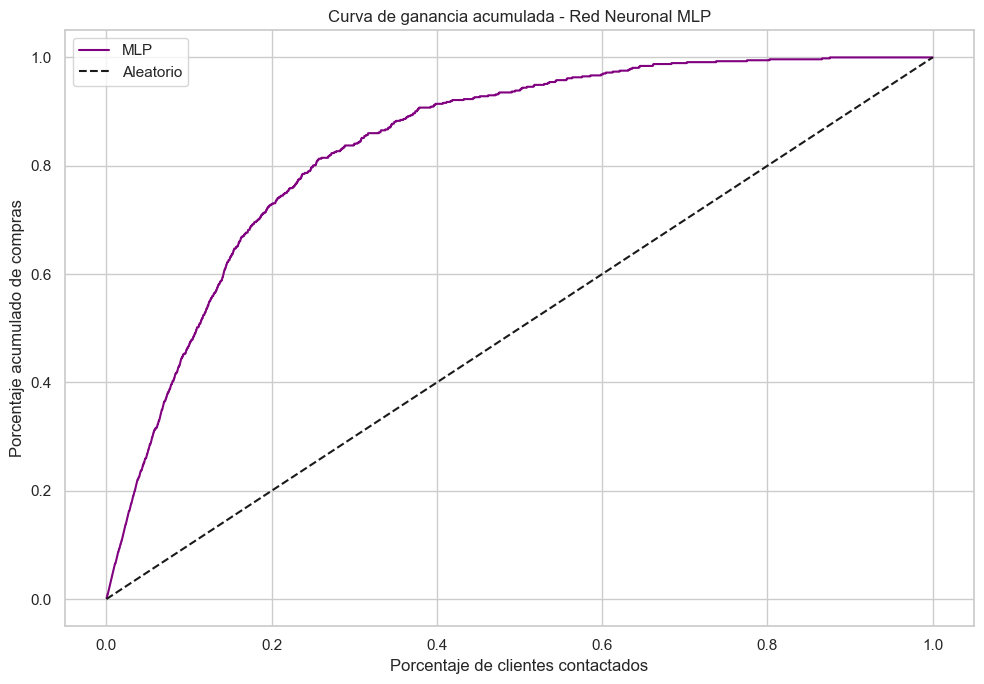

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(gain_mlp['clientes_perc'], gain_mlp['cumulative_perc'], label='MLP', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Porcentaje de clientes contactados')
plt.ylabel('Porcentaje acumulado de compras')
plt.title('Curva de ganancia acumulada - Red Neuronal MLP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

+ Subida inicial muy pronunciada, lo cual significa que en los primeros tramos (ej. top 10%-30% de clientes), el modelo concentra una gran proporción de las compras reales.
+ La curva se acerca al 100% de captación de compras antes de llegar al 100% de clientes, lo cual indica alta eficiencia de segmentación.

In [ ]:
# % de compradores captados si contacto al 30% de clientes
clientes_30 = int(0.3 * len(gain_mlp))
ganancia_30 = gain_mlp.loc[clientes_30, 'cumulative_perc']
print(f"Con el 30% de clientes mejor evaluados captas el {ganancia_30*100:.1f}% de las compras.")

Con el 30% de clientes mejor evaluados captas el 83.9% de las compras.


# Visualización de comparación de KNN vs RFC vs MLP

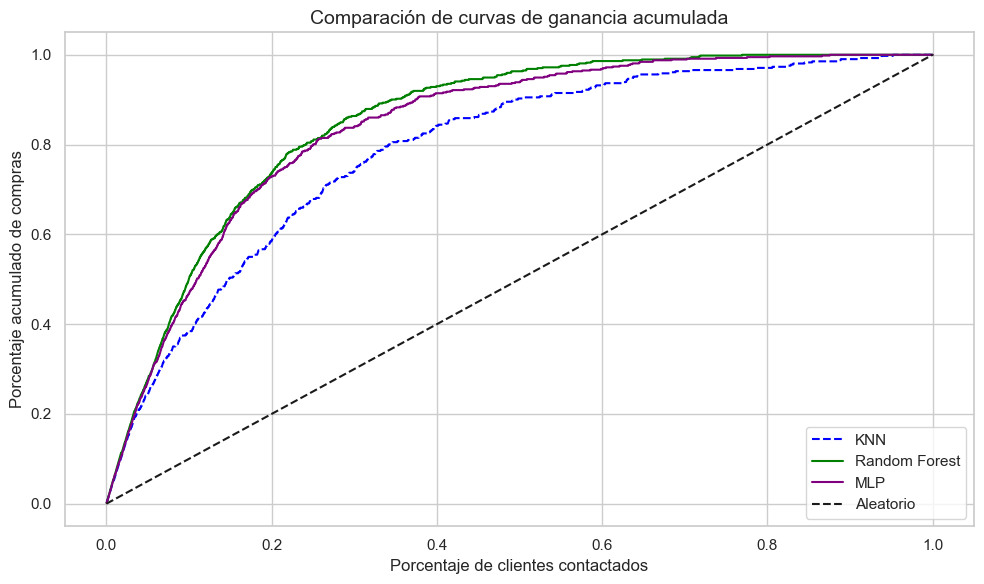

In [ ]:
plt.figure(figsize=(10, 6))

# Curva KNN
plt.plot(gain_df['clientes_perc'], gain_df['cumulative_perc'],
         label='KNN', linestyle='--', color='blue')

# Curva Random Forest
plt.plot(gain_rf['clientes_perc'], gain_rf['cumulative_perc'],
         label='Random Forest', linestyle='-', color='green')

# Curva MLP
plt.plot(gain_mlp['clientes_perc'], gain_mlp['cumulative_perc'],
         label='MLP', linestyle='-', color='purple')

# Línea aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

# Etiquetas y leyenda
plt.title('Comparación de curvas de ganancia acumulada', fontsize=14)
plt.xlabel('Porcentaje de clientes contactados')
plt.ylabel('Porcentaje acumulado de compras')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Random Forest
+ Lidera claramente durante todo el tramo inicial.
+ Con el 30% de clientes contactados, captura cerca del 86% de las compras reales, como ya vimos.
+ Es el modelo más eficiente para campañas dirigidas y toma de decisiones estratégicas.

### MLP
+ También se comporta muy bien. La curva es muy parecida a la de RFC, especialmente entre el 10%-60% de clientes contactados.
+ Apenas un poco por debajo de RFC → buena alternativa no lineal, pero no lo supera.

### KNN
+ La curva es notablemente más baja.
+ Captura menos compradores en los primeros tramos, lo cual lo hace menos eficiente desde el punto de vista de negocio.

### Conclusión final

En este proyecto se evaluaron tres modelos de clasificación supervisada con el objetivo de predecir la probabilidad de que un cliente realice una compra en un sitio web de retail. El análisis se centró en datos recolectados mediante Google Analytics, abordando desde el preprocesamiento y exploración de datos hasta la optimización y comparación de modelos.

Los modelos evaluados fueron:

🔵 K-Nearest Neighbors (KNN)

🟢 Random Forest Classifier

🟣 Red Neuronal MLP (Multi-Layer Perceptron)

| Métrica             | KNN     | Random Forest | MLP    |
| ------------------- | ------- | ------------- | ------ |
| AUC (test)          | 0.8451  | **0.9167** ✅  | 0.9027 |
| Recall (clase 1)    | 29%     | **57%** ✅     | 53%    |
| Precision (clase 1) | **77%** | 73%           | 68%    |
| Accuracy            | 86.8%   | **90.0%** ✅   | 89.0%  |
| F1-score (clase 1)  | 42%     | **64%** ✅     | 60%    |


El modelo Random Forest demostró ser el más equilibrado en cuanto a rendimiento general, logrando la mejor capacidad de discriminación entre compradores y no compradores (AUC) y un recall superior, lo que resulta esencial cuando el objetivo es capturar la mayor cantidad de compradores posibles.

### Análisis del negocio

El uso de la curva de ganancia acumulada permitió evaluar el valor práctico de cada modelo. Se observó que con el modelo Random Forest:

+ Al contactar solo al 30% de los clientes mejor evaluados, se logra captar el 86.4% de las compras reales.
+ Esto demuestra que el modelo tiene una alta eficiencia para priorizar acciones comerciales como campañas de remarketing, descuentos dirigidos o promociones focalizadas.

### Desición Final

Con base en el rendimiento técnico y el impacto en términos de negocio, se selecciona el modelo:

+ Random Forest Classifier como modelo final para la clasificación de clientes con alta probabilidad de compra online.

+ Este modelo ofrece un equilibrio óptimo entre precisión, sensibilidad y eficiencia operativa, permitiendo a la empresa tomar decisiones más informadas y rentables en su estrategia digital.